<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 5</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: José Alvarado Espinoza</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

## 1. Aplique la transformada rápida de fourier a una señal de audio
<p align="justify">
El archivo de audio debe ser formato .WAV, con menos de 30 segundo de duración.


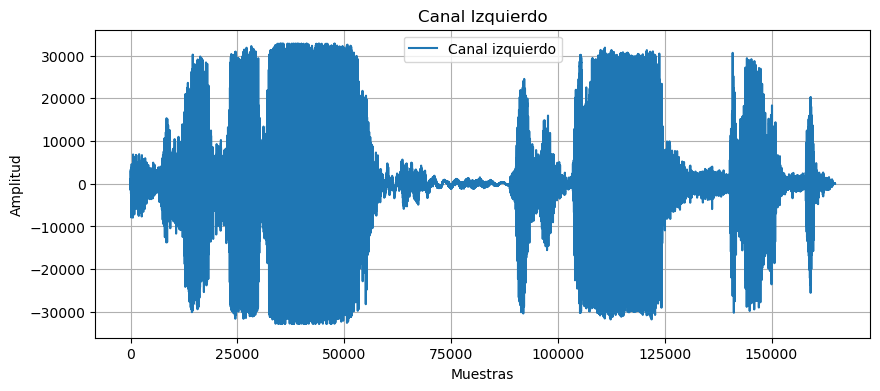

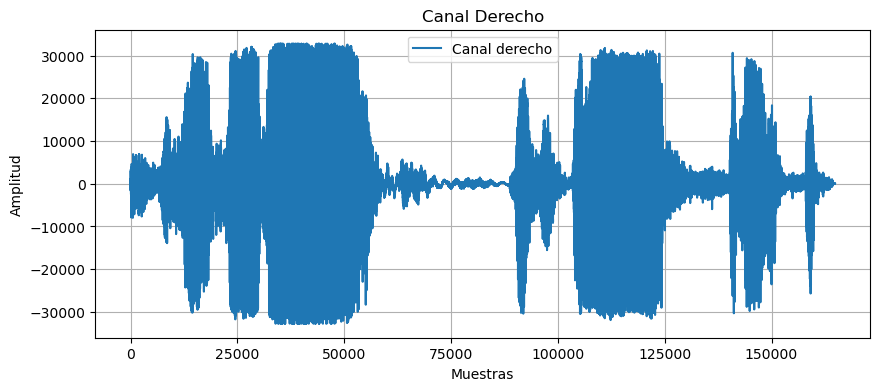

In [5]:
import wave
import numpy as np
import matplotlib.pyplot as plt

# Nombre del archivo .wav
archivo_wav = "Audio_Actividad_5.wav" # Archivo estereo sacao de un clip 

# Abrir el archivo .wav en modo lectura
with wave.open(archivo_wav, "rb") as archivo:
    # Obtener los parámetros del archivo .wav
    frame_rate = archivo.getframerate() # Frecuencia de muestreo
    n_frames = archivo.getnframes()     # Numero de muestras
    n_channels = archivo.getnchannels() # Numero de canales 1 = mono, 2 = Estereo

    # Leer todos los frames del archivo .wav y convertirlos a un arreglo de números
    frames = np.frombuffer(archivo.readframes(n_frames), dtype=np.int16)

# Si hay dos canales, dividimos los datos en dos arreglos separados
if n_channels == 2:
    canal_izquierdo = frames[::2]
    canal_derecho = frames[1::2]

    # Graficar el canal izquierdo
    plt.figure(figsize=(10, 4))
    plt.plot(canal_izquierdo, label='Canal izquierdo')
    plt.title("Canal Izquierdo")
    plt.xlabel("Muestras")
    plt.ylabel("Amplitud")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Graficar el canal derecho
    plt.figure(figsize=(10, 4))
    plt.plot(canal_derecho, label='Canal derecho')
    plt.title("Canal Derecho")
    plt.xlabel("Muestras")
    plt.ylabel("Amplitud")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("El archivo no está grabado en estéreo.")

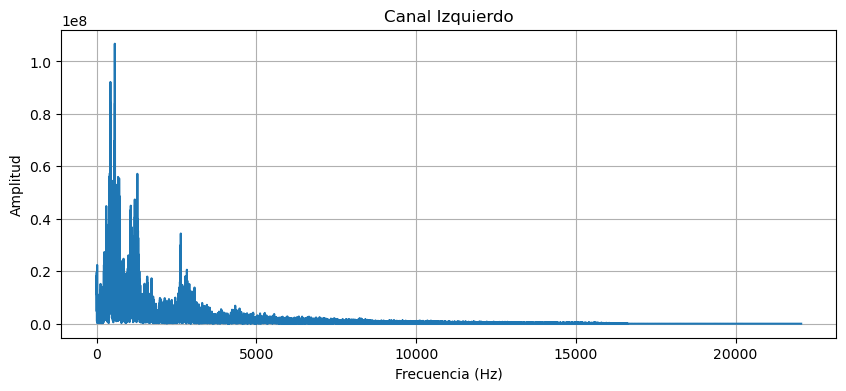

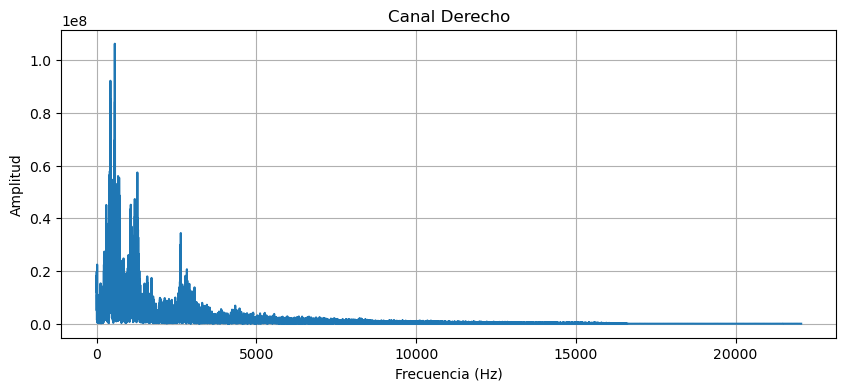

In [6]:
canal_izquierdo = frames[::2]
canal_derecho = frames[1::2]

# Calcular la FFT para cada canal
fft_izquierdo = np.fft.fft(canal_izquierdo)
fft_derecho = np.fft.fft(canal_derecho)

# Calcular las frecuencias correspondientes
frecuencias = np.fft.fftfreq(len(fft_izquierdo), 1.0 / frame_rate)

# Graficar el canal izquierdo
plt.figure(figsize=(10, 4))
plt.plot(frecuencias[:len(frecuencias)//2], np.abs(fft_izquierdo[:len(fft_izquierdo)//2]))
plt.title("Canal Izquierdo")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

# Graficar el canal derecho
plt.figure(figsize=(10, 4))
plt.plot(frecuencias[:len(frecuencias)//2], np.abs(fft_derecho[:len(fft_derecho)//2]))
plt.title("Canal Derecho")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

## 2. Obtén el espectrograma de tu señal de audio

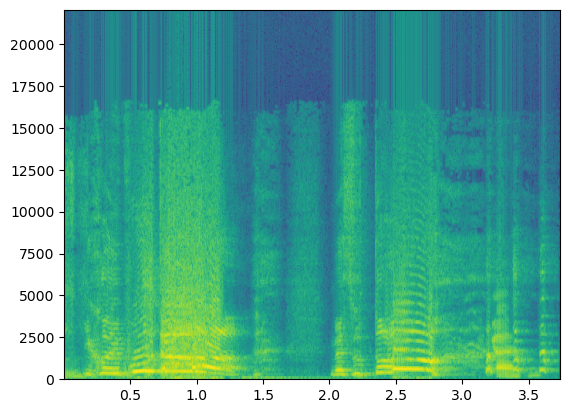

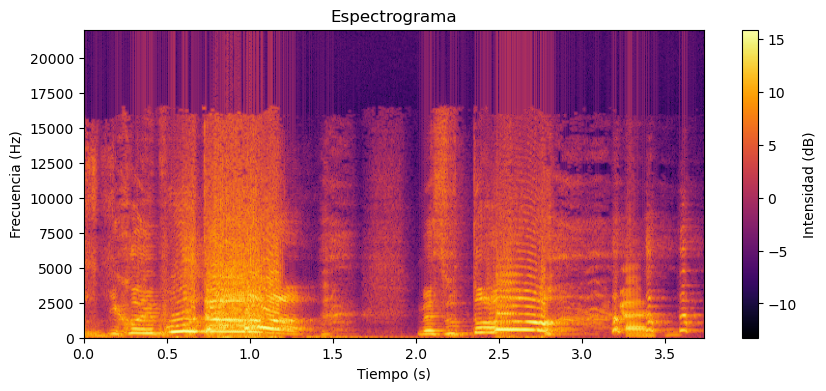

In [8]:
import wave
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del espectrograma
nfft = 512  # Tamaño de la ventana de análisis
noverlap = 256  # Superposición entre ventanas
ventana = np.hamming(nfft)  # Tipo de ventana

# Si hay dos canales, dividimos los datos en dos arreglos separados
if n_channels == 2:
    canal_izquierdo = frames[::2]
    canal_derecho = frames[1::2]

    # Calcular el espectrograma para cada canal
    espectrograma_izquierdo, frecuencias, tiempos, _ = plt.specgram(canal_izquierdo, NFFT=nfft, Fs=frame_rate, window=ventana, noverlap=noverlap)
    espectrograma_derecho, _, _, _ = plt.specgram(canal_derecho, NFFT=nfft, Fs=frame_rate, window=ventana, noverlap=noverlap)

    # Sumar los espectrogramas de los dos canales (puedes usar otra métrica)
    espectrograma_combinado = np.log(np.sqrt(espectrograma_izquierdo**2 + espectrograma_derecho**2))

    # Graficar el espectrograma combinado
    plt.figure(figsize=(10, 4))
    plt.imshow(np.flipud(espectrograma_combinado), extent=[0, tiempos[-1], 0, frame_rate/2], aspect='auto', cmap='inferno')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Frecuencia (Hz)')
    plt.title('Espectrograma')
    plt.colorbar(label='Intensidad (dB)')
    plt.show()
else:
    print("El archivo no está grabado en estéreo.")

## 3. Slicing
Desarrolla un framento de código que te permita tomar una señal de audio y framentarla en N segmentos o slices. Debe asignar la longitud temporal de cada slice y el programa debe indicar el número de slices que quedan. Considera que al final puede quedar un slice de longitud diferente a todos los demas.

En el slicing debes también incluir un gap o overlap a lado y lado de cada uno de los fragmentos. Este overlap debe ser ajustable del número de muestras que constituyen dicho overlap.

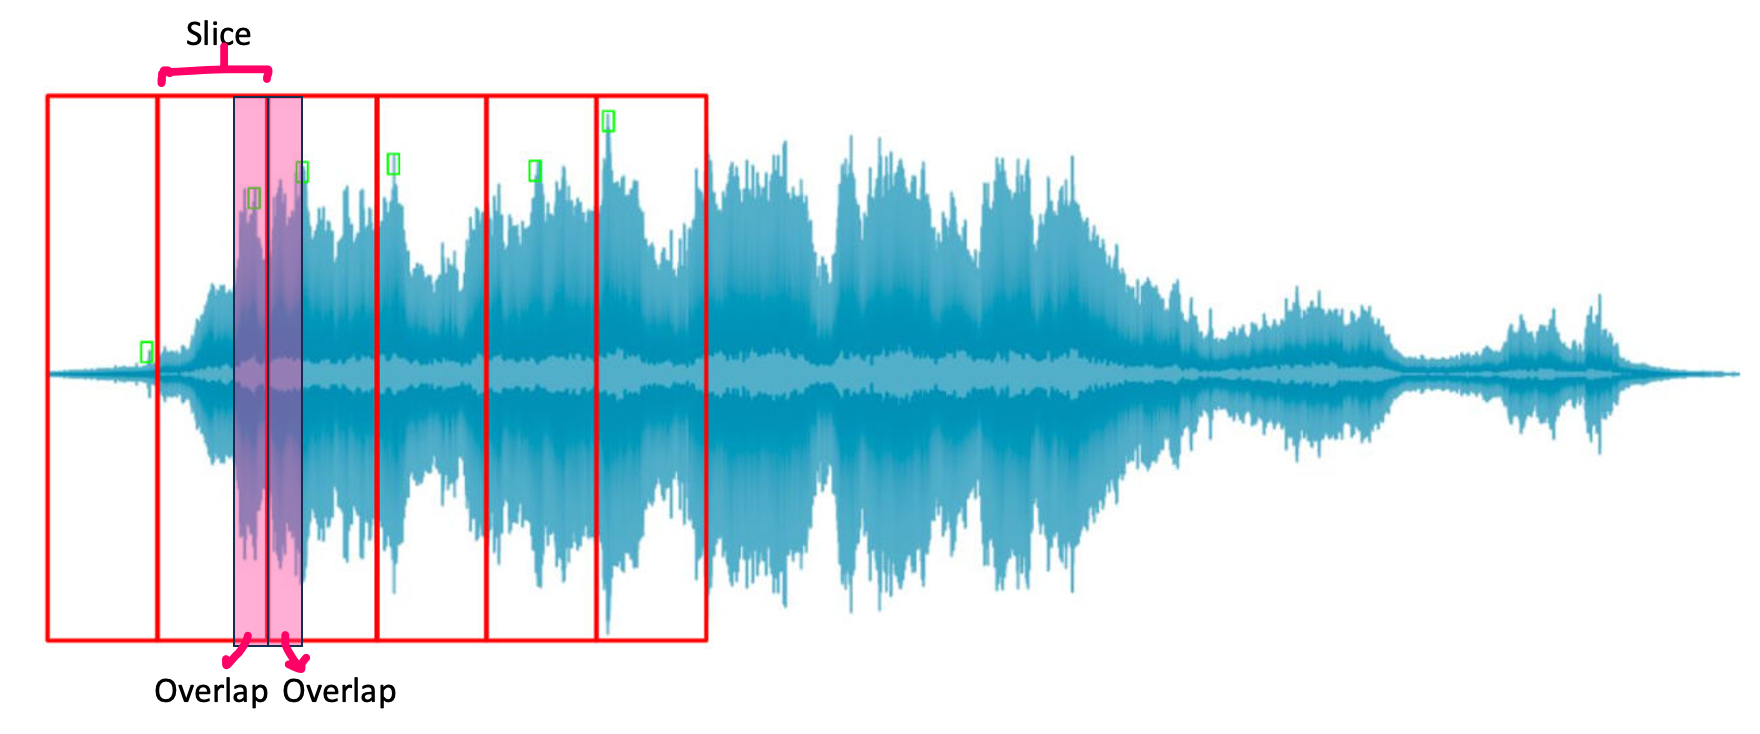

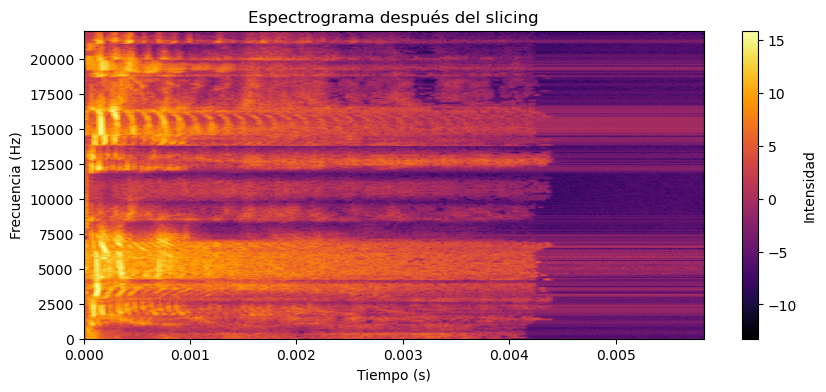

In [10]:
import wave
import numpy as np
import matplotlib.pyplot as plt

def slice_audio(archivo, longitud_slice, overlap):
    # Abrir el archivo .wav en modo lectura
    with wave.open(archivo, 'rb') as archivo_wav:
        # Obtener los parámetros del archivo .wav
        frame_rate = archivo_wav.getframerate()
        n_frames = archivo_wav.getnframes()
        n_channels = archivo_wav.getnchannels()

        # Calcular el tamaño del overlap en número de muestras
        overlap_muestras = int(overlap * frame_rate)

        # Calcular el tamaño de cada slice en número de muestras
        longitud_slice_muestras = int(longitud_slice * frame_rate)

        # Inicializar variables
        inicio_slice = 0
        numero_slice = 0

        # Lista para almacenar los frames de audio de cada slice
        frames_slices = []

        # Iterar sobre los frames de la señal de audio
        while inicio_slice < n_frames:
            # Calcular el final del slice
            fin_slice = min(inicio_slice + longitud_slice_muestras, n_frames)

            # Leer los frames del archivo .wav para el slice actual
            archivo_wav.setpos(inicio_slice)
            frames = archivo_wav.readframes(fin_slice - inicio_slice)

            # Incrementar el número de slice
            numero_slice += 1

            # Agregar los frames del slice a la lista
            frames_slices.append(frames)

            # Actualizar el inicio del próximo slice
            inicio_slice = inicio_slice + longitud_slice_muestras - overlap_muestras

        return frames_slices, frame_rate

# Archivo WAV
archivo_audio = "Audio_Actividad_5.wav"

# Parámetros para el slicing
longitud_slice_segundos = 1
overlap = 0.5

# Realizar el slicing del audio
frames_slices, frame_rate = slice_audio(archivo_audio, longitud_slice_segundos, overlap)

# Escribir el audio con slicing en un nuevo archivo WAV
with wave.open("Audio_Slicing.wav", 'wb') as archivo_salida:
    archivo_salida.setnchannels(1)  # Mono
    archivo_salida.setsampwidth(2)  # 16 bits por muestra
    archivo_salida.setframerate(frame_rate)
    for frames in frames_slices:
        archivo_salida.writeframes(frames)

# Graficar el espectrograma combinado
plt.figure(figsize=(10, 4))
plt.imshow(np.flipud(espectrograma_combinado.T), aspect='auto', cmap='inferno', extent=[0, len(espectrograma_combinado)/frame_rate, 0, frame_rate/2])
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.title('Espectrograma después del slicing')
plt.colorbar(label='Intensidad')
plt.show()


## 3.1 Slicing usando Pytorch de la señal obtenida en el primer punto.
Debes crear un array con los slices creados a partir de tensores en pytorch.
Grafica un par de tus slices y reproduce el audio.


In [12]:
import librosa
import torch
import matplotlib.pyplot as plt

# Cargar el archivo de audio con librosa
waveform, sample_rate = librosa.load("Audio_Actividad_5.wav", sr=None)

# Convertir a tensor de PyTorch
waveform = torch.tensor(waveform)

# Convertir a mono si es estéreo
if waveform.dim() == 2:
    waveform = waveform.mean(dim=0, keepdim=True)

# Parámetros de slicing
longitud_slice_segundos = 1.0
overlap = 0.5

# Longitud del overlap en muestras
overlap_muestras = int(overlap * sample_rate)

# Longitud de cada slice en muestras
longitud_slice_muestras = int(longitud_slice_segundos * sample_rate)

# Realizar el slicing
slices = []
inicio = 0
while inicio + longitud_slice_muestras <= waveform.shape[1]:
    slice_actual = waveform[:, inicio:inicio + longitud_slice_muestras]
    slices.append(slice_actual)
    inicio += longitud_slice_muestras - overlap_muestras

# Graficar un par de slices
plt.figure(figsize=(12, 4))
plt.plot(waveform[0, :20000].numpy(), label='Audio original')
plt.plot(slices[0][0].numpy(), label='Slice 1')
plt.plot(slices[1][0].numpy(), label='Slice 2')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Audio original y dos slices')
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'librosa'

## 4. Filtro Butterworth para una señal de audio.
Diseña y aplica un filtro butterworth a tu señal de audio.
Muestra un gráfico con la respuesta del filtro butterworth y explica el resultado.

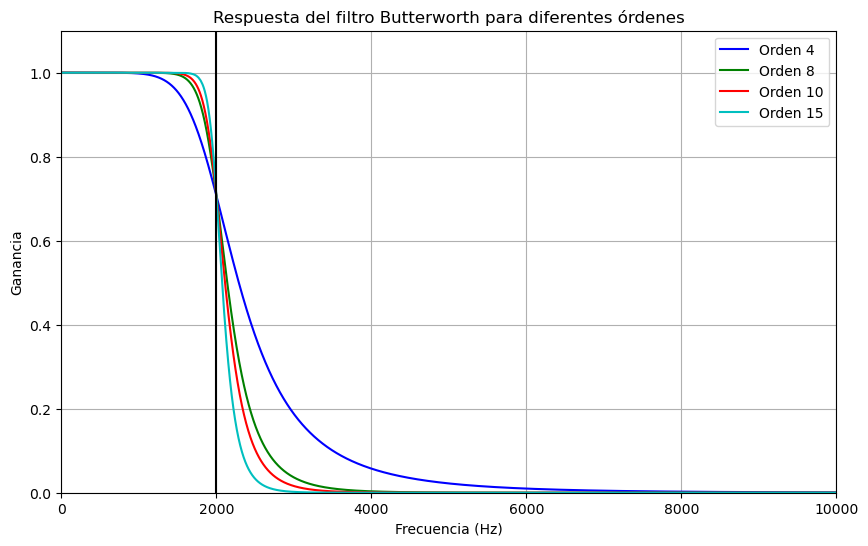

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, freqz

# Frecuencia de muestreo
fs = 44100  # Hz

# Frecuencia de corte
fc = 2000  # Hz

# Normalizar la frecuencia de corte
fc_norm = fc / (fs / 2)

# Ordenes de los filtros a probar
ordenes = [4, 8, 10, 15]

# Colores para cada orden
colores = ['b', 'g', 'r', 'c']

# Graficar la respuesta del filtro Butterworth para cada orden
plt.figure(figsize=(10, 6))
for orden, color in zip(ordenes, colores):
    b, a = butter(orden, fc_norm, btype='low')
    w, h = freqz(b, a, worN=8000)
    plt.plot(0.5 * fs * w / np.pi, np.abs(h), color, label="Orden %d" % orden)

# Añadir etiquetas y leyenda
plt.title("Respuesta del filtro Butterworth para diferentes órdenes")
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia')
plt.axvline(fc, color='k')  # Línea vertical en la frecuencia de corte
plt.xlim(0, 10000)
plt.ylim(0, 1.1)
plt.grid(True)
plt.legend()
plt.show()



## 4. Referencias
<p align="justify">
    
[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Análisis espectral] https://currents.soest.hawaii.edu/ocn_data_analysis/_static/Spectrum.html
